<a href="https://colab.research.google.com/github/larasacodes/ML_Project_LaraAmusan/blob/main/Wine_Quality_Predictor_LaraAmusan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Individual Project - Wine Quality Score Predictions - Lara Amusan**

## **1. Problem and Dataset**

##### **Project Objective**
The project objective is to predict the quality of wine based on its chemical properties.


##### **Methodology**
Two datasets containing various chemical properties of red and white variants of the Portuguese "Vinho Verde" wine to train machine learning models in order to predict wine quality score (between 0 and 10).


##### **Dataset**
The dataset is from UC Irvine Machine Learning Repository: https://archive.ics.uci.edu/dataset/186/wine+quality

##### **Dataset Variables**
The (uncleaned) dataset variables include:
* Fixed acidity (g/dm^3)
* volatile acidity (g/dm^3)
* citric acid (g/dm^3)
* residual sugar (g/dm^3)
* chlorides (g/dm^3)
* free sulfur dioxide (mg/dm^3)
* total sulfur dioxide (mg/dm^3)
* density (g/cm^3)
* pH (0 - 12)
* sulphates (g/dm^3)
* alcohol (%)
* quality (score between 0 and 10)
* color (red or white - this is not defined in the dataset, but by the dataset being split into 2 files).

Thorough exploration of the property variables used for testing can be found below in the Data Processing section.

## **2.  Data Preprocessing & Cleaning**

Upon loading the relevant libraries and loading the dataset via url link to the repository, where the dataset is placed, the data available can then be assessed. And then the preprocessing procedures can be determined.

In [1]:
#!pip install scikeras

In [3]:
# Import all libraries needed for the project

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree, export_text
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import Callback, EarlyStopping
from scikeras.wrappers import KerasClassifier
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RepeatedKFold, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, precision_score, recall_score, f1_score
from sklearn.utils import resample
import random
import re

First the datasets were loaded from the GitHub repository. Note that 'sep=';'' was used, as the data is not comma delimited, but delimited by a semi colon, ;.

In [4]:
# Loading the data, via GitHub repository. Please update the url as the token expires after some time.

# Red Wine Dataset
urlr=("https://raw.githubusercontent.com/larasacodes/ML_Project_LaraAmusan_CSVFiles/main/winequality-red.csv")
raw_data_red = pd.read_csv(urlr, sep=';')

# White Wine Dataset
urlw=("https://raw.githubusercontent.com/larasacodes/ML_Project_LaraAmusan_CSVFiles/main/winequality-white.csv")
raw_data_white = pd.read_csv(urlw, sep=';')

In [5]:
# Displaying first 5 rows of the data for the red wine dataset

raw_data_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
# Displaying first 5 rows of the data for the white wine dataset

raw_data_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Now that the data has been uploaded and it can be seen that both datasets have the same variables included, it was decided that merging the dataset would be the best approach. This is because having a larger dataset would be better for analysis and model training, as well as a more efficient process.

However, firstly to identify the red from white dataset, a new column including the wine colour will be added to each dataset.

In [7]:
# Adding a new column 'colour' and setting the value to 'red' for all rows in the red wine dataset

raw_data_red['colour'] = 'red'


# Displaying to check

raw_data_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,colour
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [8]:
# Adding a new column 'colour' and setting the value to 'white' for all rows in the white wine dataset

raw_data_white['colour'] = 'white'


# Displaying to check

raw_data_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,colour
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [9]:
# Combine the red and white wine datasets

raw_red_white_data = pd.concat([raw_data_red, raw_data_white], ignore_index=True)  # ignore index so the index doesn't start at 0 again for the added dataset


# Displaying to check

raw_red_white_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,colour
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


The top rows show red wine data and the bottom rows show white wine data, so we can assume that the data has ben successfully merged, and is ready for remaining cleaning processes.

Remaining steps in the data cleaning process:
* Dataset is checked for any missing values
* Dataset is checked for any duplicate values (and any duplicate values are removed)
* Amount of red wine and white wine values are checked (to see if balanced)
* Sort dataset in ascending score order to check for any obvious outliers at each end, which will then be removed. This is because it will be difficult to validate if the ML models perform well at that extreme scores as the dataset does not have enough data around that score.
* Once done, rename the dataset to mark the completion of cleaning.

In [10]:
# Check for missing values

missing = raw_red_white_data.isnull().sum()
print(missing)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
colour                  0
dtype: int64


In [11]:
# Check for duplicates

raw_red_white_data[raw_red_white_data.duplicated()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,colour
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.400000,5,red
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.500000,5,red
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.500000,5,red
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.500000,5,red
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.900000,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6427,6.4,0.230,0.35,10.30,0.042,54.0,140.0,0.99670,3.23,0.47,9.200000,5,white
6449,7.0,0.360,0.35,2.50,0.048,67.0,161.0,0.99146,3.05,0.56,11.100000,6,white
6450,6.4,0.330,0.44,8.90,0.055,52.0,164.0,0.99488,3.10,0.48,9.600000,5,white
6455,7.1,0.230,0.39,13.70,0.058,26.0,172.0,0.99755,2.90,0.46,9.000000,6,white


In [12]:
# Removing duplicates

raw_red_white_data = raw_red_white_data.drop_duplicates()

In [13]:
# Check to see all duplicates have been dropped

raw_red_white_data[raw_red_white_data.duplicated()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,colour


In [14]:
# Grouping wines by colour to determine the count

wine_colours = raw_red_white_data.groupby('colour').size().reset_index(name='Count')

print(wine_colours)

  colour  Count
0    red   1359
1  white   3961


There are clearly more white wines than red wines in the dataset. In order to prevent a model bias towards the white wine, I will aim to use sampling techniques in the model building process in order to have a good representation of both colour wines.

In [15]:
# Sorting by ascending order for quality to see what the highest and lowest quality score is.

raw_red_white_data = raw_red_white_data.sort_values(by='quality', ascending=True)

raw_red_white_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,colour
3287,6.7,0.250,0.26,1.55,0.041,118.5,216.0,0.99490,3.55,0.63,9.4,3,white
1469,7.3,0.980,0.05,2.10,0.061,20.0,49.0,0.99705,3.31,0.55,9.7,3,red
4906,9.4,0.240,0.29,8.50,0.037,124.0,208.0,0.99395,2.90,0.38,11.0,3,white
4864,4.2,0.215,0.23,5.10,0.041,64.0,157.0,0.99688,3.42,0.44,8.0,3,white
6344,6.1,0.260,0.25,2.90,0.047,289.0,440.0,0.99314,3.44,0.64,10.5,3,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2475,6.9,0.360,0.34,4.20,0.018,57.0,119.0,0.98980,3.28,0.36,12.7,9,white
2419,6.6,0.360,0.29,1.60,0.021,24.0,85.0,0.98965,3.41,0.61,12.4,9,white
2373,9.1,0.270,0.45,10.60,0.035,28.0,124.0,0.99700,3.20,0.46,10.4,9,white
3204,7.1,0.260,0.49,2.20,0.032,31.0,113.0,0.99030,3.37,0.42,12.9,9,white


It does not seem that there are any quality score outliers, so no data will be removed at this stage. Unfortunately, there is no data for wine quality scores below 3 and 9. This means that our model will not have sufficient data to accurately predict wine scores that fall outside the rage of 3 - 9.

In [16]:
# Resetting the index

raw_red_white_data = raw_red_white_data.reset_index(drop=True)

raw_red_white_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,colour
0,6.7,0.250,0.26,1.55,0.041,118.5,216.0,0.99490,3.55,0.63,9.4,3,white
1,7.3,0.980,0.05,2.10,0.061,20.0,49.0,0.99705,3.31,0.55,9.7,3,red
2,9.4,0.240,0.29,8.50,0.037,124.0,208.0,0.99395,2.90,0.38,11.0,3,white
3,4.2,0.215,0.23,5.10,0.041,64.0,157.0,0.99688,3.42,0.44,8.0,3,white
4,6.1,0.260,0.25,2.90,0.047,289.0,440.0,0.99314,3.44,0.64,10.5,3,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5315,6.9,0.360,0.34,4.20,0.018,57.0,119.0,0.98980,3.28,0.36,12.7,9,white
5316,6.6,0.360,0.29,1.60,0.021,24.0,85.0,0.98965,3.41,0.61,12.4,9,white
5317,9.1,0.270,0.45,10.60,0.035,28.0,124.0,0.99700,3.20,0.46,10.4,9,white
5318,7.1,0.260,0.49,2.20,0.032,31.0,113.0,0.99030,3.37,0.42,12.9,9,white


The data types of each column are also checked

In [17]:
# Displaying data types

print(raw_red_white_data.dtypes)

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
colour                   object
dtype: object


All the columns that we want to include for our models are of a numerical data type ('colour' will not be used, rather and encoded version).

As the cleaning process is now complete, we can finally rename our dataset to represent the fact that it is now cleaned.

In [18]:
# Renaming the dataset and displaying

cleaned_wine_data = raw_red_white_data
cleaned_wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,colour
0,6.7,0.250,0.26,1.55,0.041,118.5,216.0,0.99490,3.55,0.63,9.4,3,white
1,7.3,0.980,0.05,2.10,0.061,20.0,49.0,0.99705,3.31,0.55,9.7,3,red
2,9.4,0.240,0.29,8.50,0.037,124.0,208.0,0.99395,2.90,0.38,11.0,3,white
3,4.2,0.215,0.23,5.10,0.041,64.0,157.0,0.99688,3.42,0.44,8.0,3,white
4,6.1,0.260,0.25,2.90,0.047,289.0,440.0,0.99314,3.44,0.64,10.5,3,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5315,6.9,0.360,0.34,4.20,0.018,57.0,119.0,0.98980,3.28,0.36,12.7,9,white
5316,6.6,0.360,0.29,1.60,0.021,24.0,85.0,0.98965,3.41,0.61,12.4,9,white
5317,9.1,0.270,0.45,10.60,0.035,28.0,124.0,0.99700,3.20,0.46,10.4,9,white
5318,7.1,0.260,0.49,2.20,0.032,31.0,113.0,0.99030,3.37,0.42,12.9,9,white


## **3.   Exploratory Data Analysis (EDA)**

In this section, the cleaned dataset was explored through statistic calculations and visual displays. This helps us to get a better picture of the data we have in terms of range, features and coorelations. This also helped further in determining the model to use for predictions.


Firstly a histogram of the wine qualities was displayed nby wine colour to show its distribution, most and least common scores, and to see if the score data is skewed or if there are any anomalies.

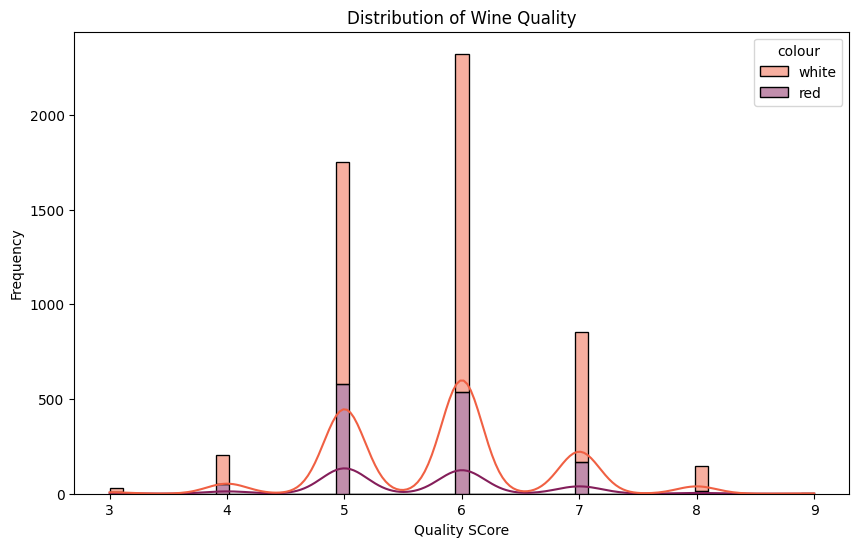

In [19]:
# Function showing the distribution of wine qualities

plt.figure(figsize=(10,6))
sns.histplot(x='quality', data=cleaned_wine_data, hue='colour', palette='rocket_r', kde=True, multiple='stack') # the hue specifies that the plots should be plit by red and white wines
plt.title('Distribution of Wine Quality')
plt.xlabel('Quality SCore')
plt.ylabel('Frequency')
plt.show()

One can see that the wine quality data is showing a normal distribution as the centre value, 6 has the highest frequency, and with frequency dropping outwards on either side. However there is a slight right skew, with a higher frequency of scores of 5, 4 and 3 then there are for scores of 7, 8 and 9. This can be seen for both red and white wines, but with the red wine having a lower frequency as there is less data for red wines.

Below, the function goes through the listed chemical properties and uses seaborn to make a scatter plot for each variable to see how they relate to wine quality.

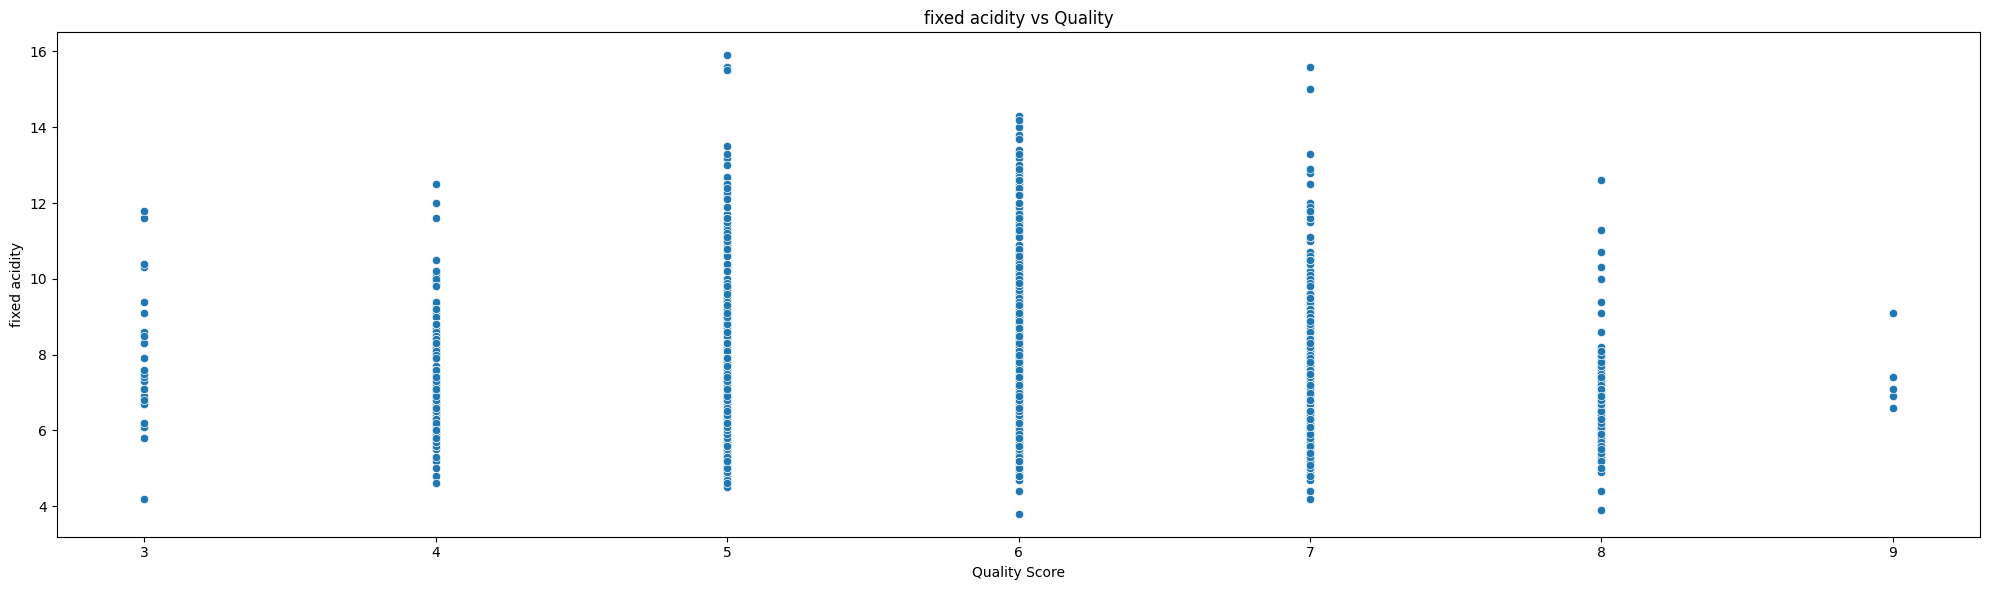

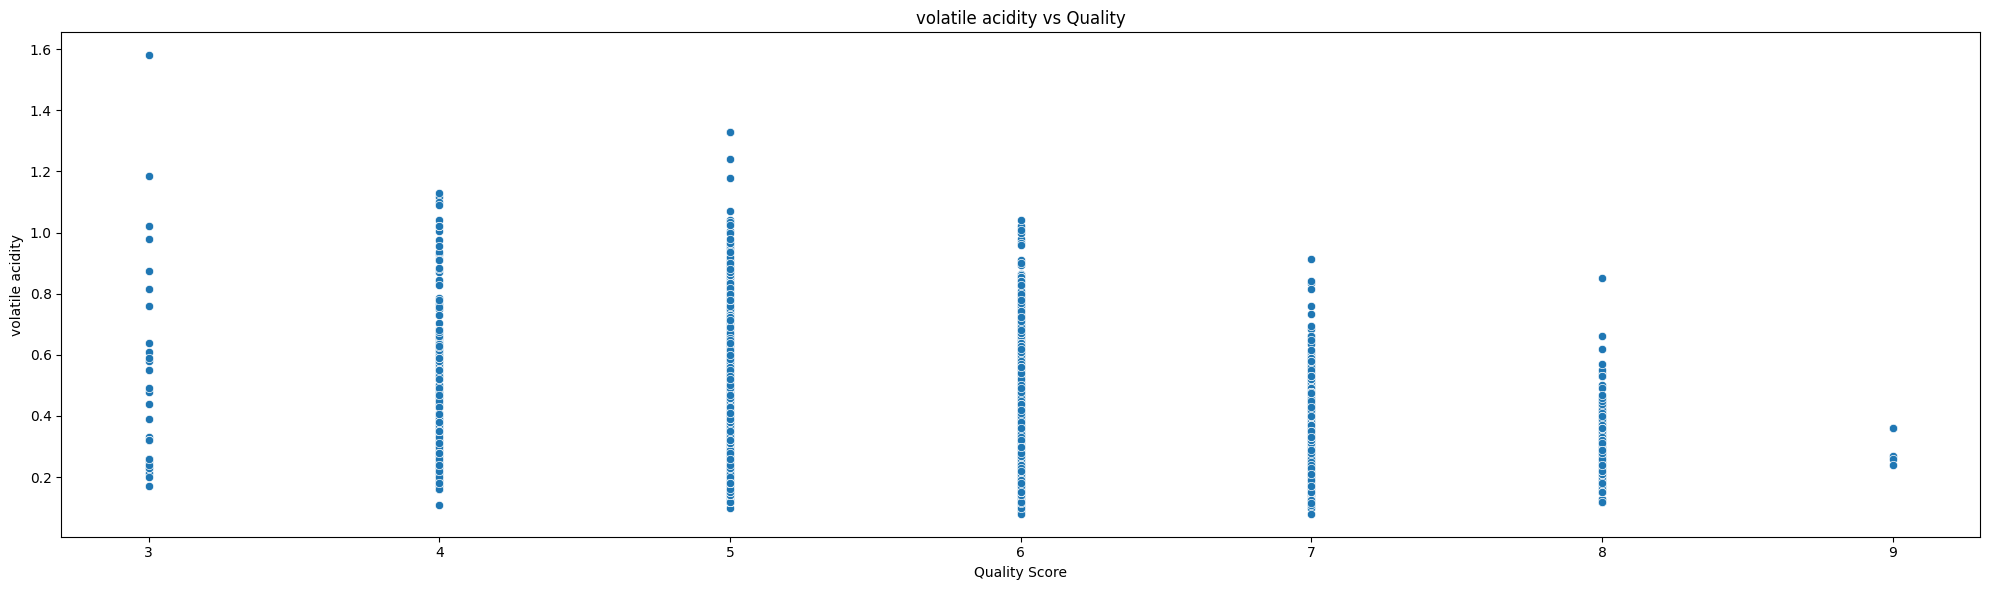

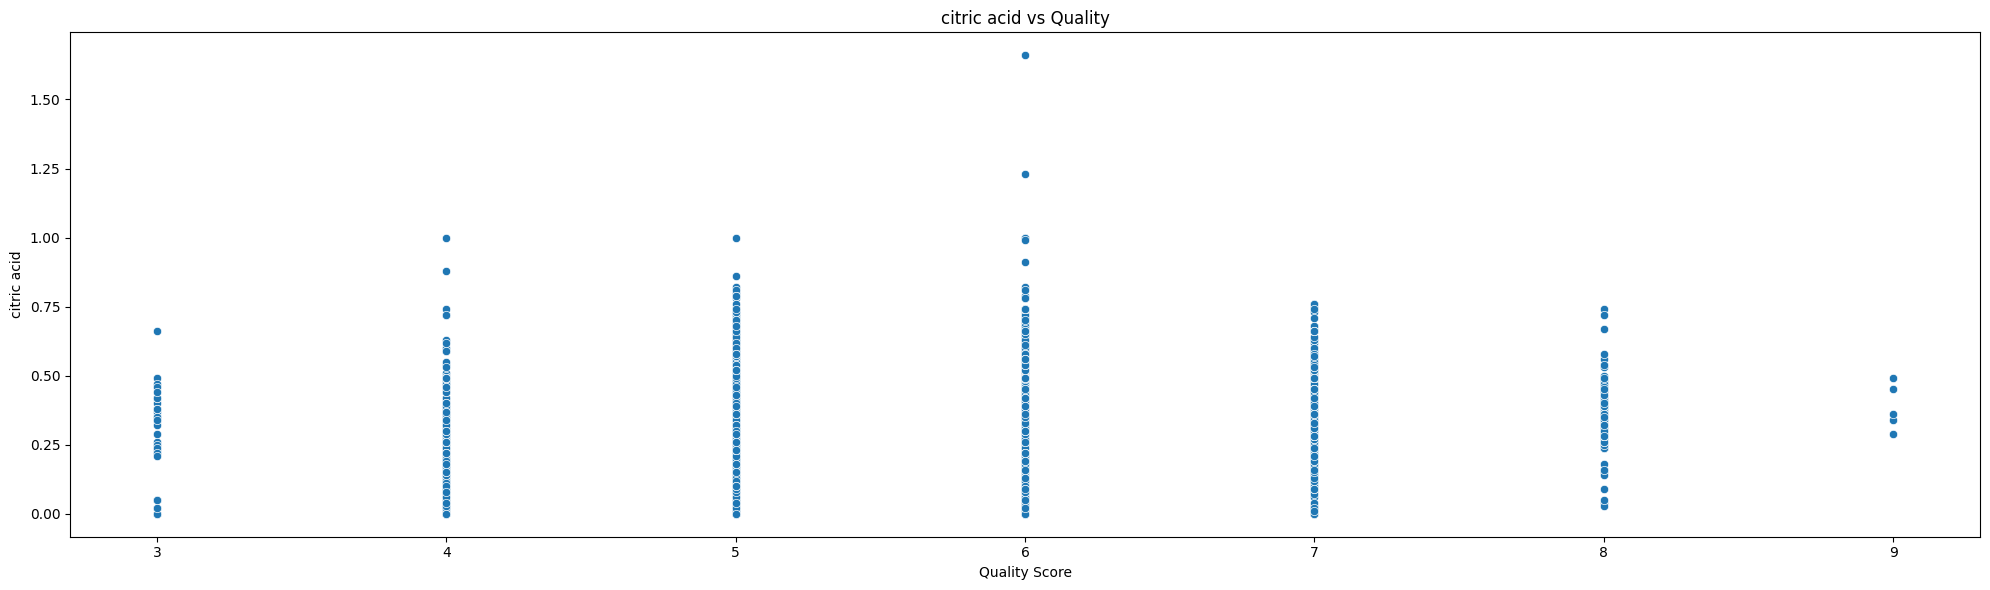

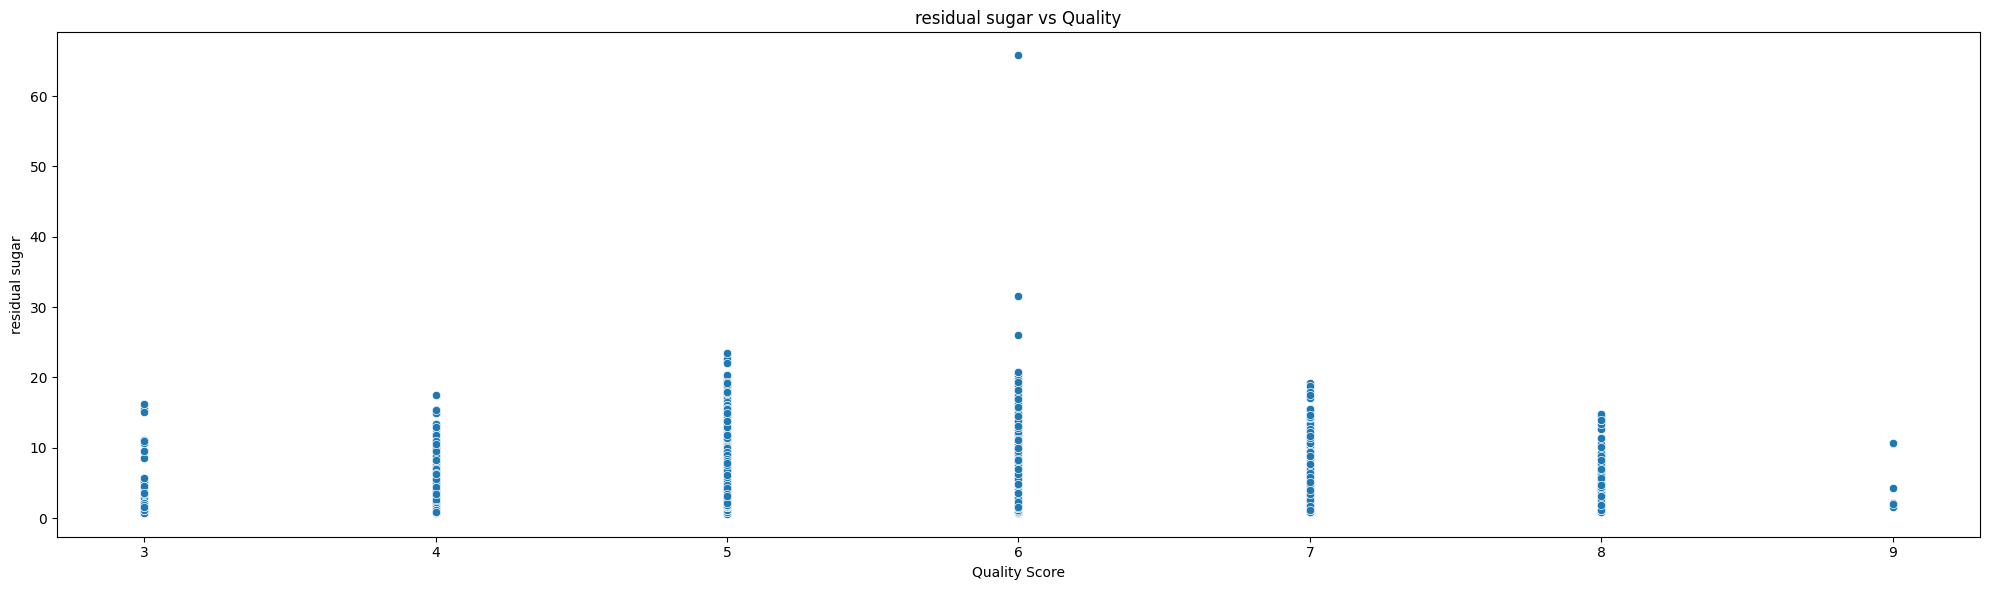

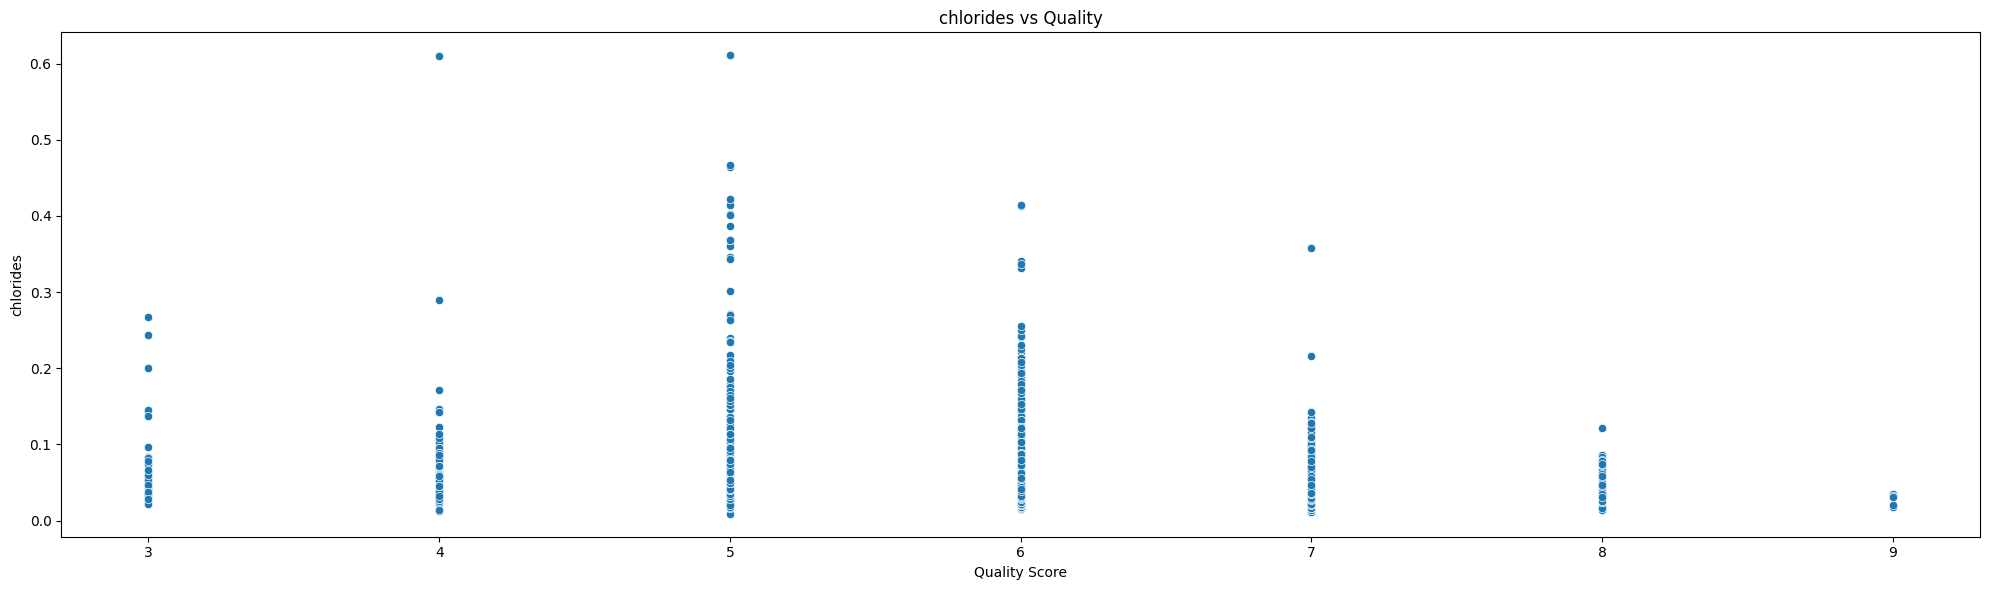

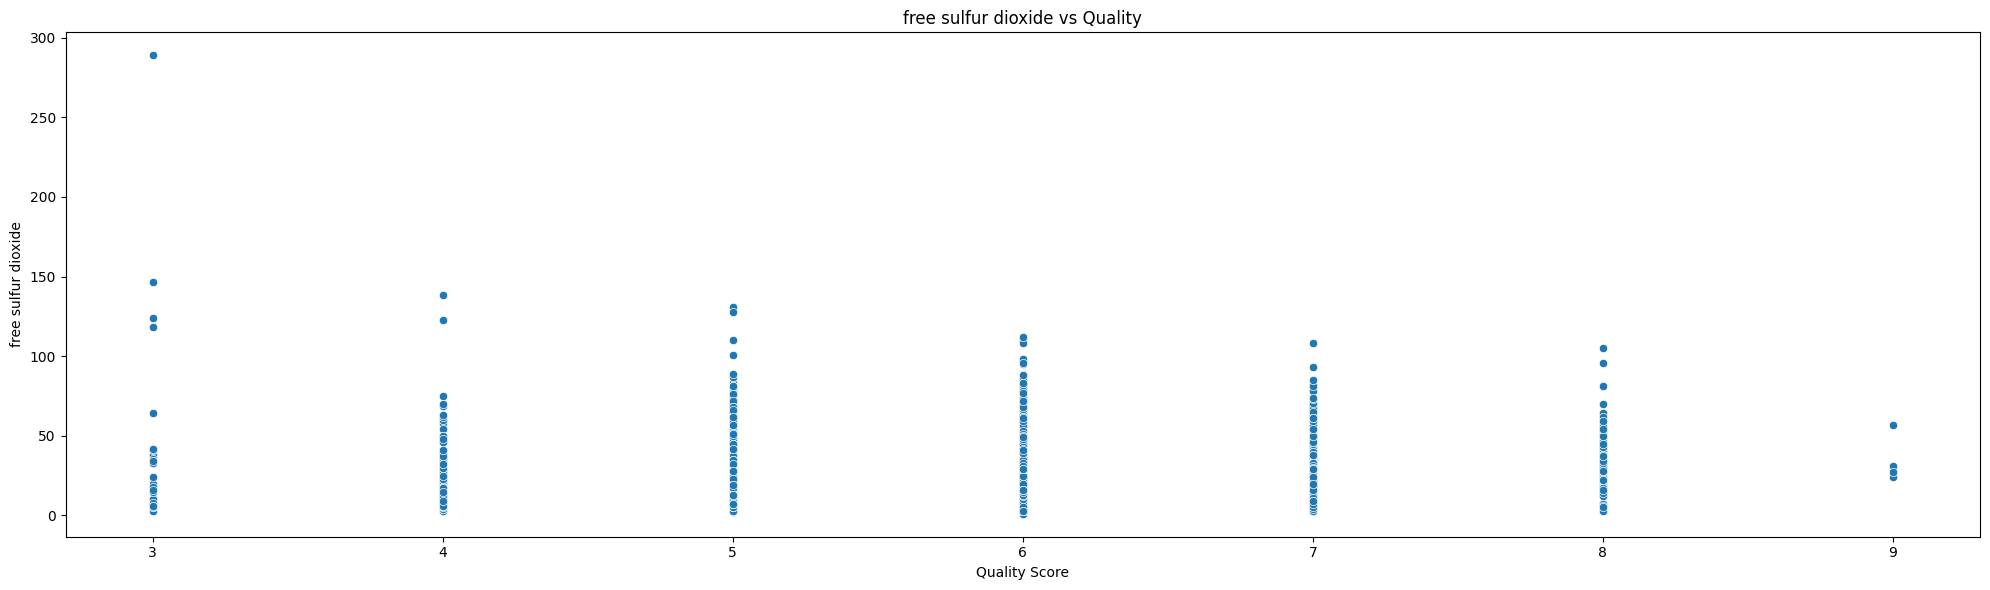

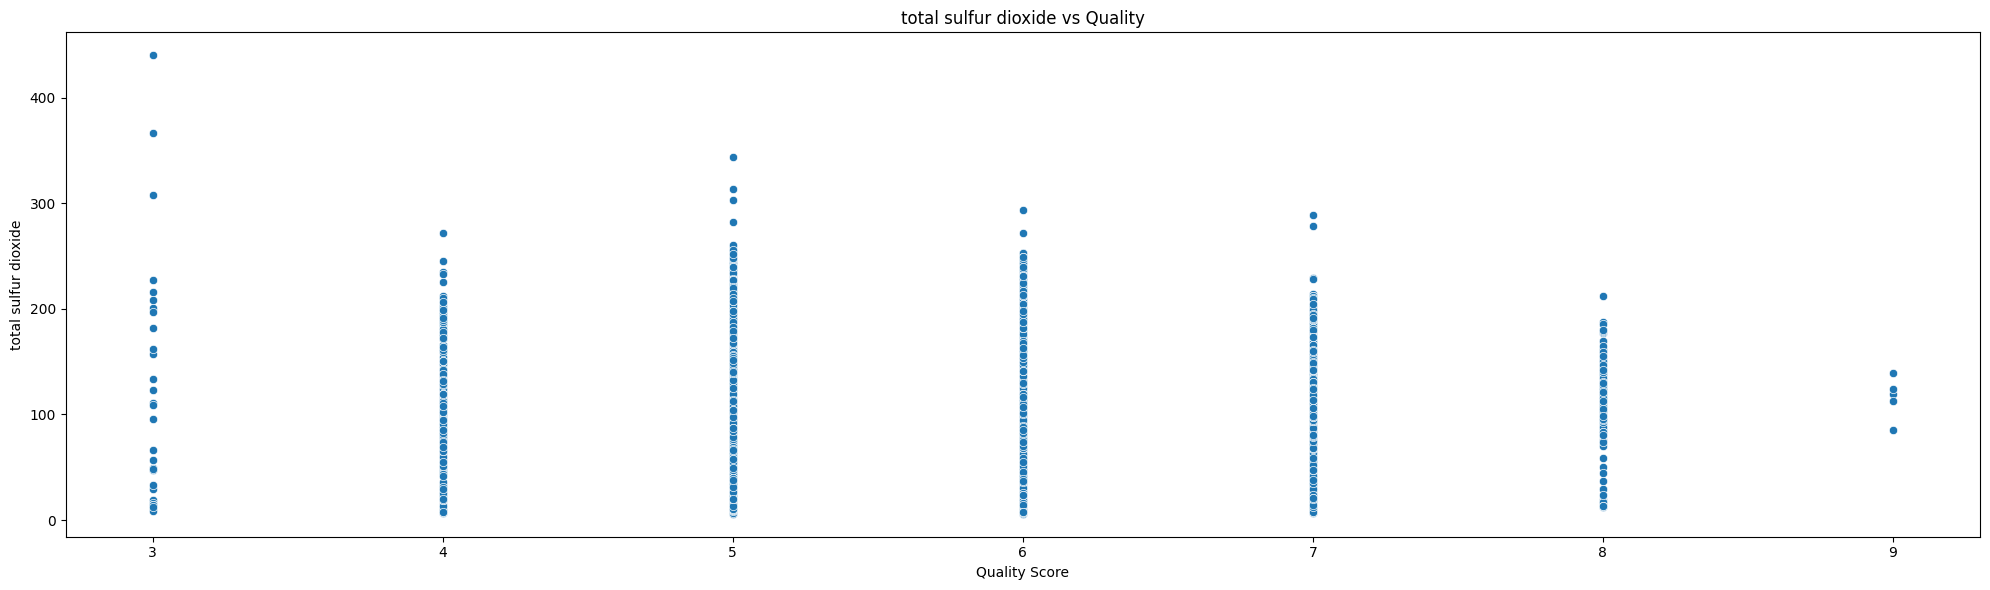

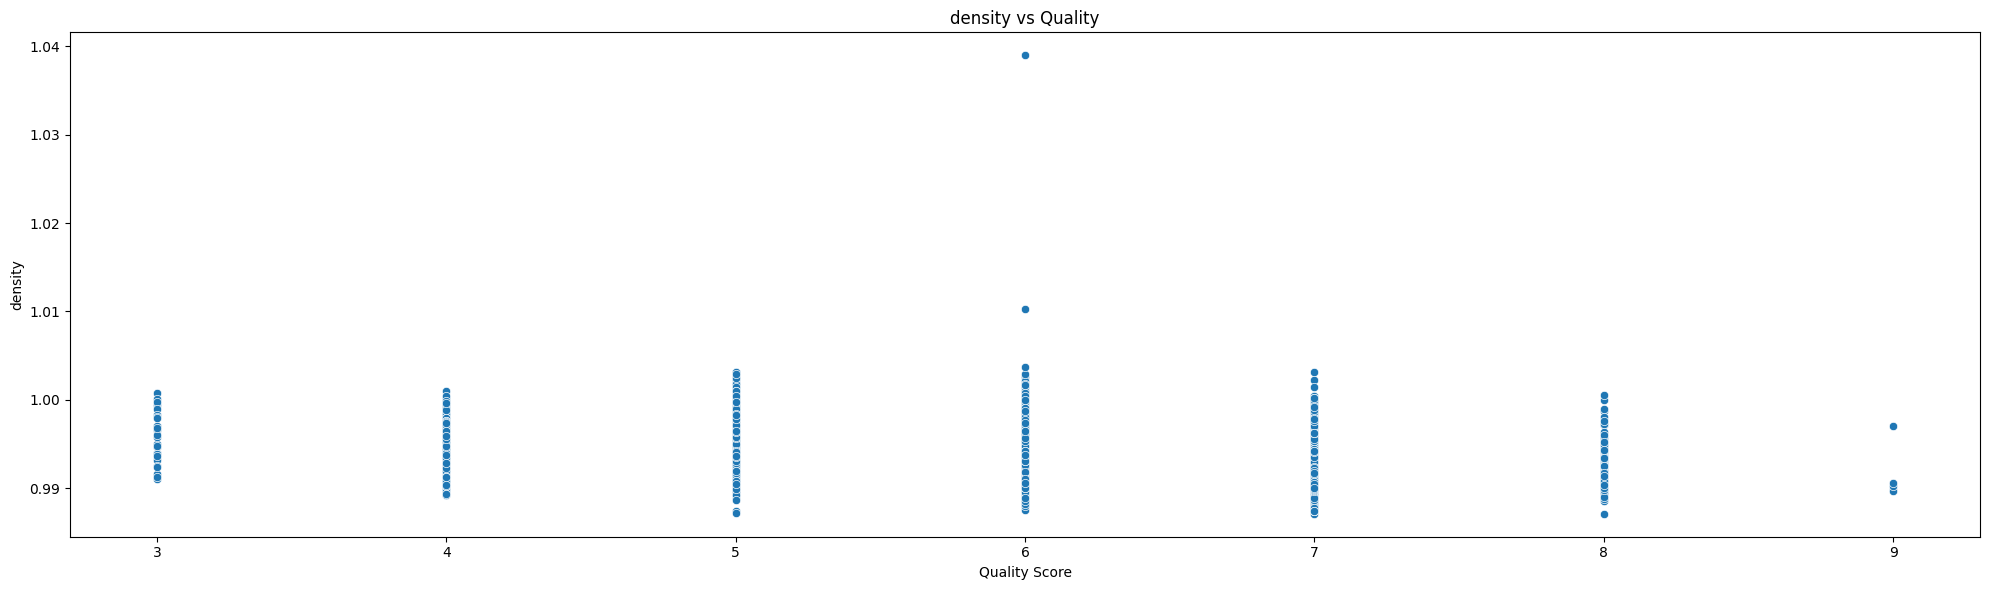

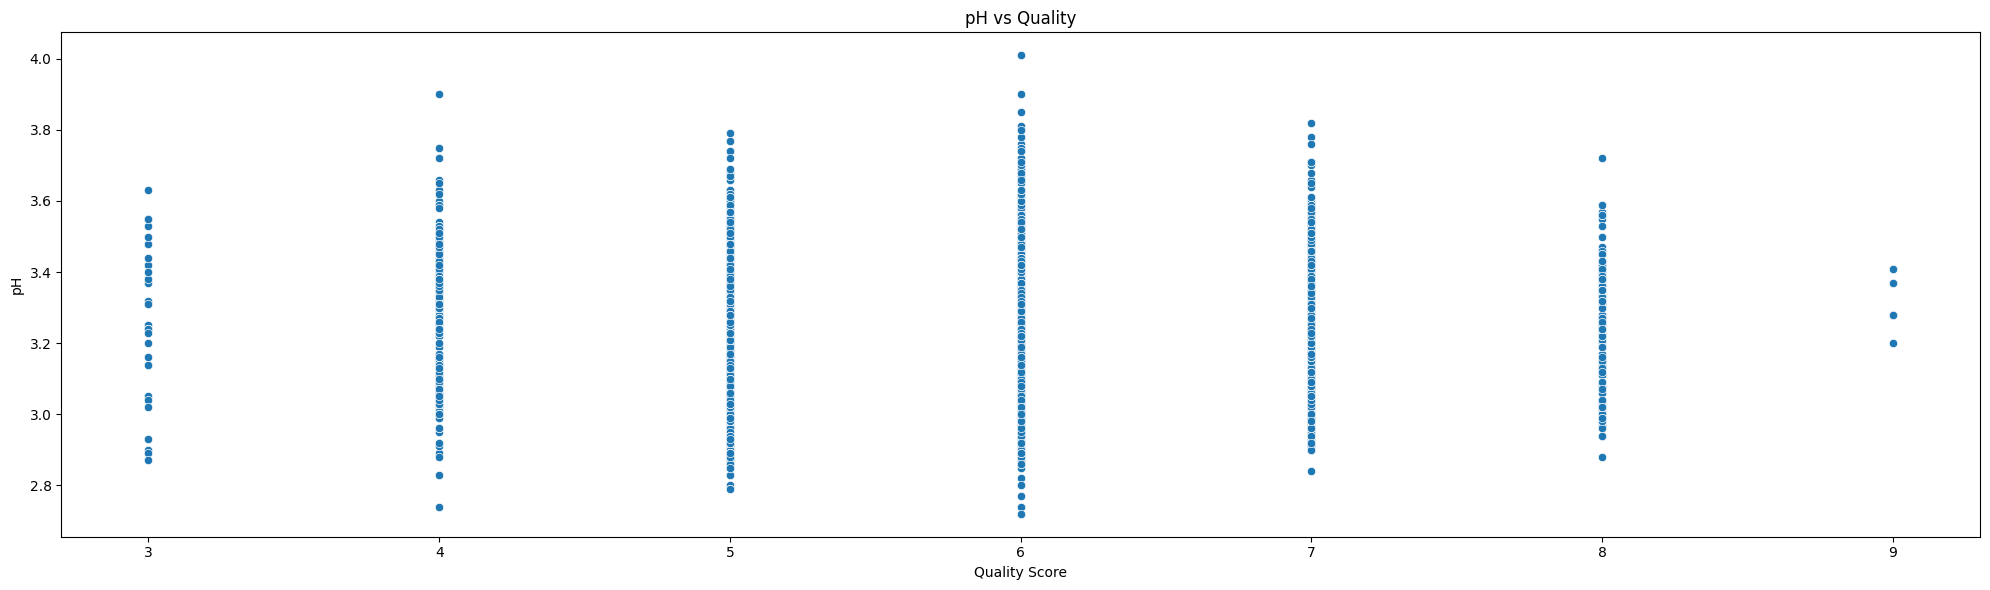

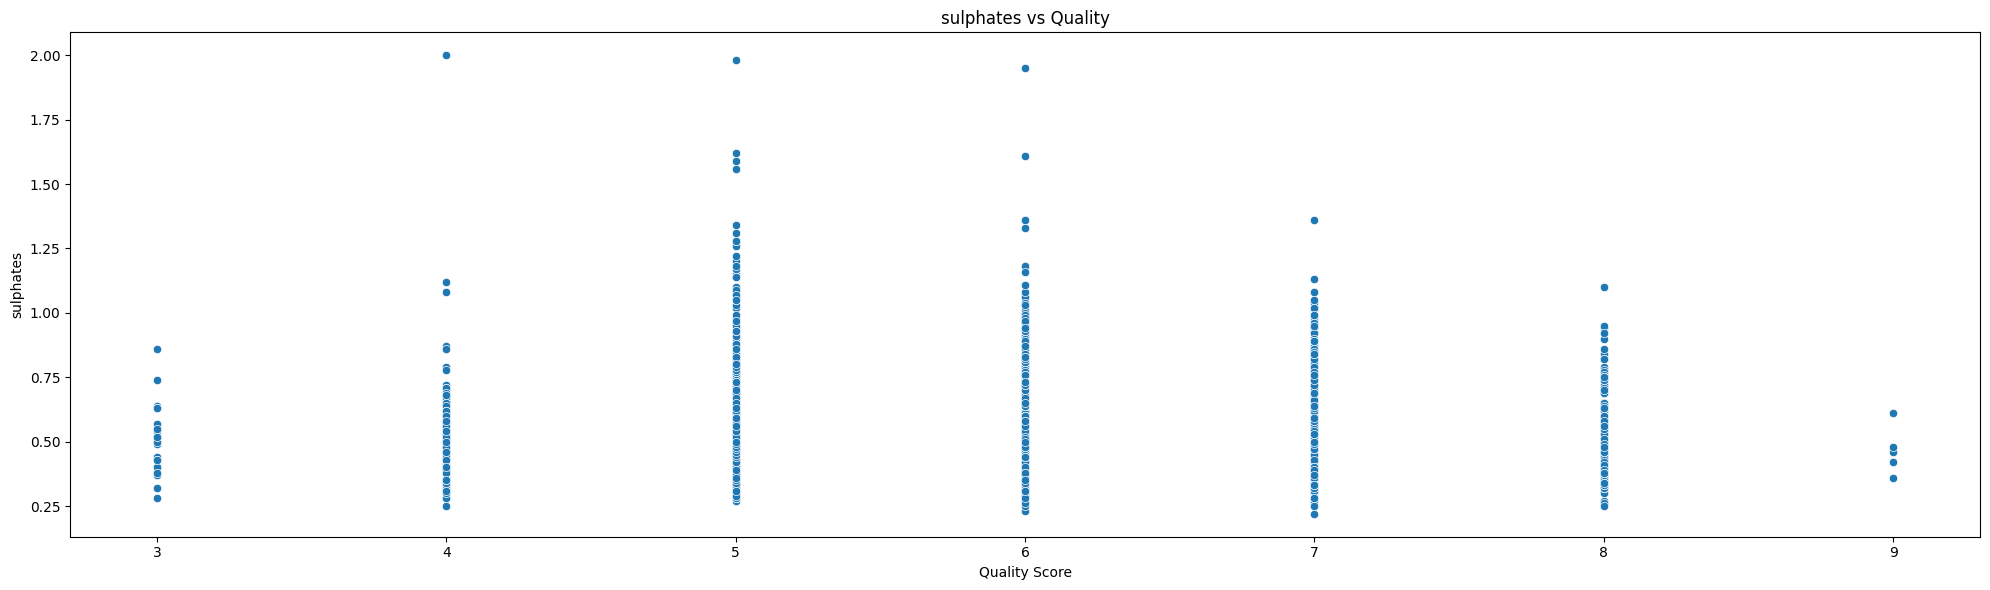

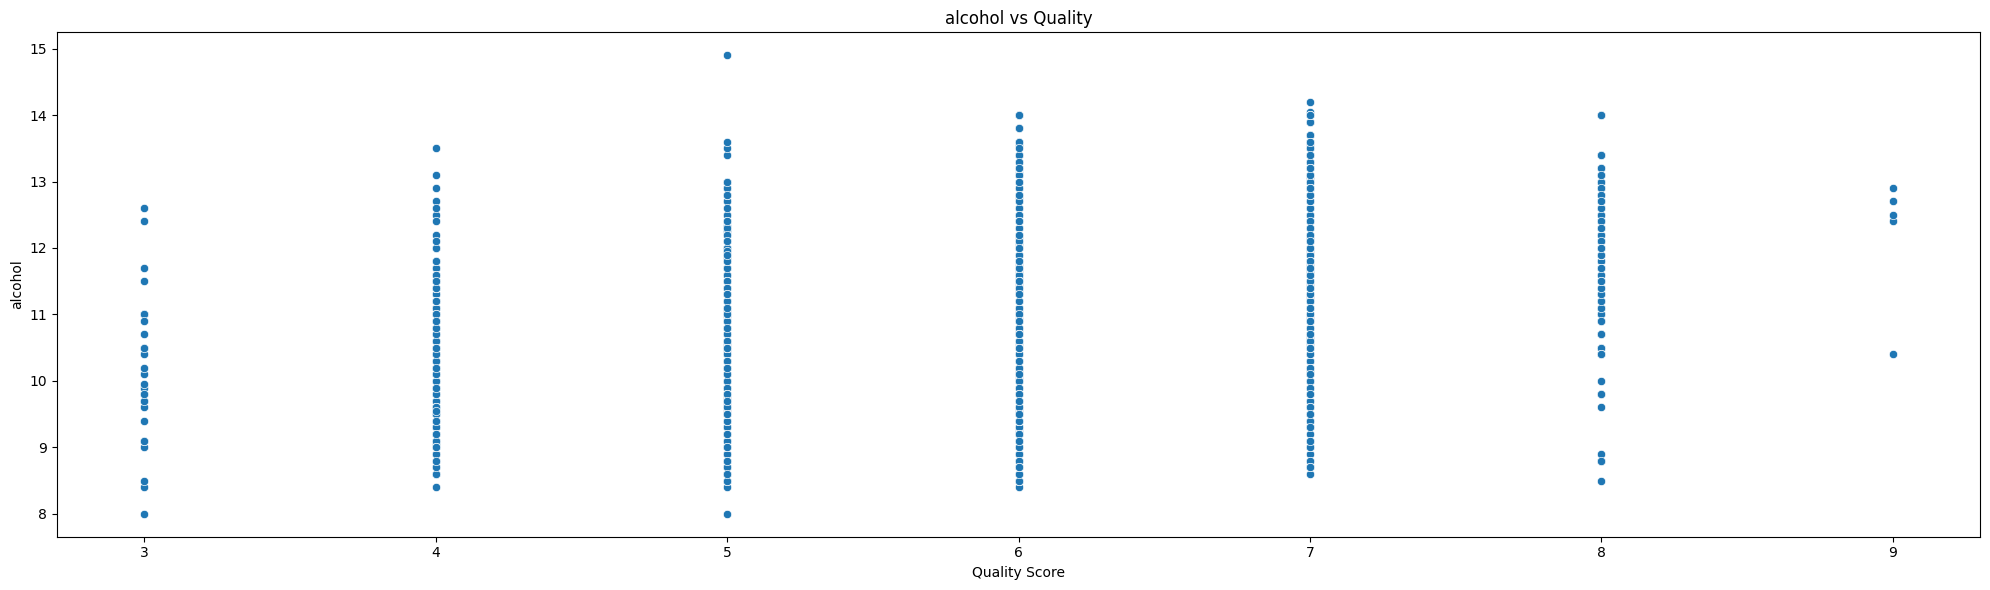

In [20]:
# For loop plot a scatterplots to see the relationship between wine chemical properties and wine quality

features = ['fixed acidity',	'volatile acidity',	'citric acid',	'residual sugar',	'chlorides',	'free sulfur dioxide',	'total sulfur dioxide',	'density',	'pH',	'sulphates',	'alcohol']
for feature in features:
    plt.figure(figsize=(20, 6))
    sns.scatterplot(x=cleaned_wine_data['quality'], y=cleaned_wine_data[feature])
    plt.title(f'{feature} vs Quality')
    plt.xlabel('Quality Score')
    plt.ylabel(feature)
    plt.tight_layout()
    plt.show()

Qualities 3 - 9 are well represented across all chemical properties, with the highest concentration for quality 6, and decreasing in concentration for the lowest and highest quality score.

From here, a correlation heatmap was plotted to better understand the relationships between the variables.

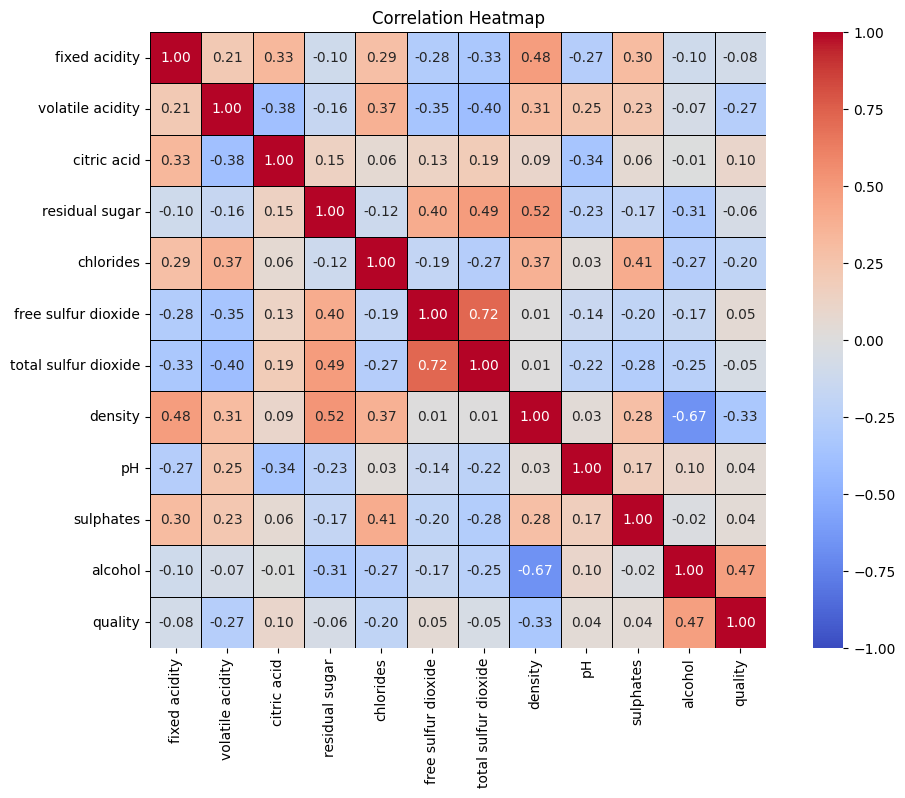

In [21]:
# Selecting the properties with numeric data and defining this in a dataset for the correlation matrix

numerical_cols = ['fixed acidity',	'volatile acidity',	'citric acid',	'residual sugar',	'chlorides',	'free sulfur dioxide',	'total sulfur dioxide',	'density',	'pH',	'sulphates',	'alcohol', 'quality']
numeric_df = cleaned_wine_data[numerical_cols]

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0,
            linewidths=0.5, linecolor='black', square=True, fmt='.2f',
            annot_kws={'size': 10})

plt.title('Correlation Heatmap')
plt.show()

**Key takeaways from the correlation matrix:**
* The only property that the wine quality had a (moderate) high (positive) correlation with is the amount of alcohol.
* There was a high positive correlation between the amount of free and total sulfur dioxide, which is to be expected, as free sulfur dioxide makes part of the calculation to calculate total sulfur dioxide.
* There was a high positive correlation between the residual sugar and the density, which would be a interesting correlation to explore further.
* There was a high negative correlation between the amount of alcohol and the wine density. Again, this is to be expected, as a higher alcohol concentration means a lower density.
* There was a low/no correlation between the wine quality and the remaining variables. These may have less predictive power individually but could still contribute in combination with the other variables. A non-linear model like a decision tree may be able to handle these variables well, capturing non-linear relationships that correlation alone might not reveal.

Since there was a high positive correlation between the residual sugar and the density, I decided to display this on a scatter graph to see if more insights could be made.

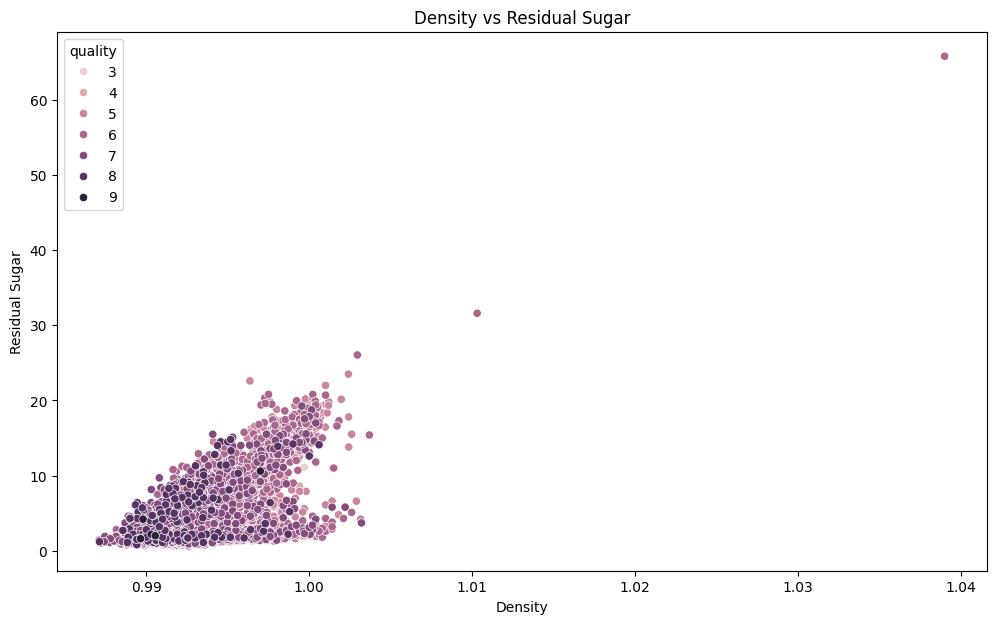

In [22]:
# Plotting a scatter plot

plt.figure(figsize=(12,7))
sns.scatterplot(x='density',y='residual sugar',data=cleaned_wine_data, hue = cleaned_wine_data['quality'])
plt.title('Density vs Residual Sugar')
plt.xlabel('Density')
plt.ylabel('Residual Sugar')
plt.show()


The graph interestingly shows how the density mainly groups in the 0.99 - 1.00 range, and residual sugar between 0 and 25. There are also only 1 obvious outlier. The data points with the highest quality scores seem to be on the low density and residual sugar. This helps to show how even though independantly these features do not have a high correlation with quality, the features used together can help show patterns in the quality - something that more complex models may be able to identify.

Also, since alcohol has the highest correlation with the wine quality, it would be interesting to further look at the distribution of the data through these two variables, over a box plot.

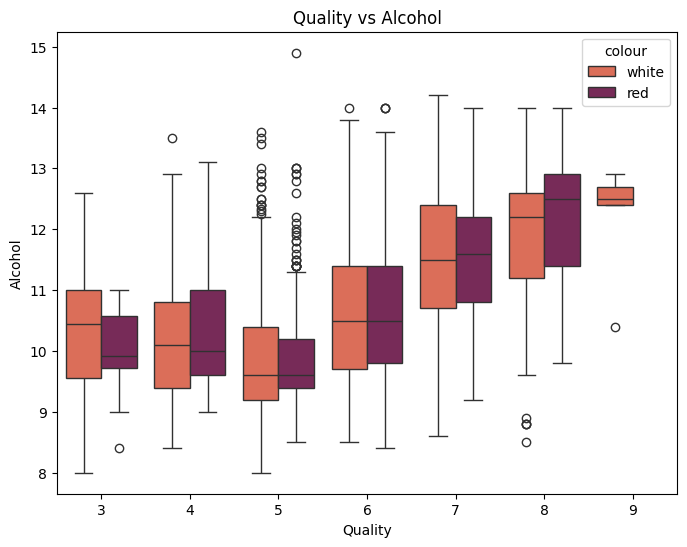

In [23]:
# Plot the boxplot

plt.figure(figsize=(8, 6))
sns.boxplot(x='quality', y='alcohol', data=cleaned_wine_data, hue='colour', palette='rocket_r') # the hue specifies that the plots should be split by red and white wines

plt.title('Quality vs Alcohol')
plt.xlabel('Quality')
plt.ylabel('Alcohol')
plt.show()

**Key takeaways from the box plot:**
* The box plot reiterates the fact that the higher the alcohol concentration, the better the quality of the wine. The range of the data also seemse to decrease with increase in quality score.
* The median values on the box plots show that red wines are generally higher in alcohol amount compared to white wines of the same quality.  
* There are a significant amount of outlier for both red and white wines with a quality score of 5, showing that the alcohol amount is higher than expected for a wine of that quality.

The high correlation and resutlts from this box plot show that the alcohol content will be important in training a machine learning model to determine the quality of a wine. However, the overlapping box plots in the figure above also indicate the influence of other properties on the wine quality.

Due to the significant amount of outliers, these will now be removed usig a function and the boxplot features.

In [24]:
# Defining the function for removal out outliers

def remove_outliers(data, group_columns, outlier_check):

    # Grouping the data by the columns given
    grouped = data.groupby(group_columns)

    # Defining the function that will calculate the box plot range ends,
    # then it will determine upper and lower bounds and return what is within these bounds
    def iqr_filter(group):
        Q1 = group[outlier_check].quantile(0.25)
        Q3 = group[outlier_check].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5*IQR
        upper_bound = Q3 + 1.5*IQR
        return group[(group[outlier_check] >= lower_bound) & (group[outlier_check] <= upper_bound)]

    # Now the filter function can be applied
    filtered_data = grouped.apply(iqr_filter).reset_index(drop=True)
    return filtered_data

# Removing outliers using the function
cleaned_wine_data = remove_outliers(cleaned_wine_data, ['quality', 'colour'], 'alcohol')

The box plot can now be run again to check that the outliers have been removed.

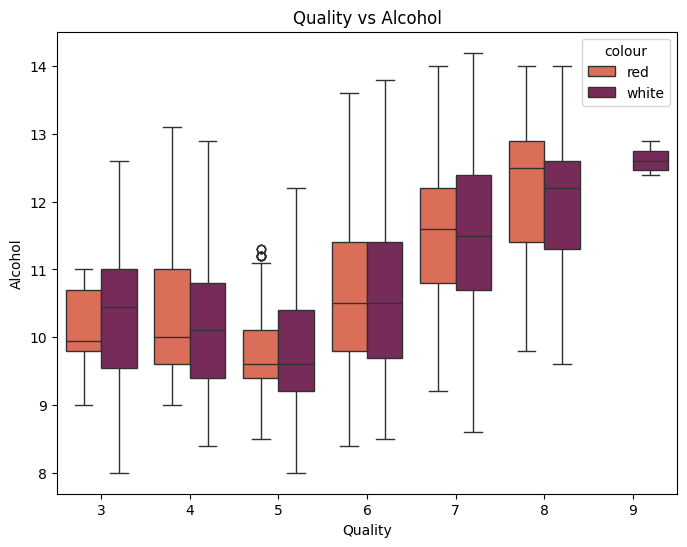

In [25]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='quality', y='alcohol', data=cleaned_wine_data, hue='colour', palette='rocket_r') # the hue specifies that the plots should be split by red and white wines

plt.title('Quality vs Alcohol')
plt.xlabel('Quality')
plt.ylabel('Alcohol')
plt.show()

One can see that most of the outliers have been removed. This will hopefully aid in a good accuracy value of our models.

Finally, the data was grouped by wine colour, and plotted by mean wine quality score. Due to the nature of heatmaps, brands could not be included in the heatmap above as they are categorical in nature and not numerical. As such, this graph was created to further illustrate the effect wine colour has on quality score.

<ipython-input-26-7a92ce766763>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='colour', y='quality', data=avg_quality_by_colour, palette='rocket_r')


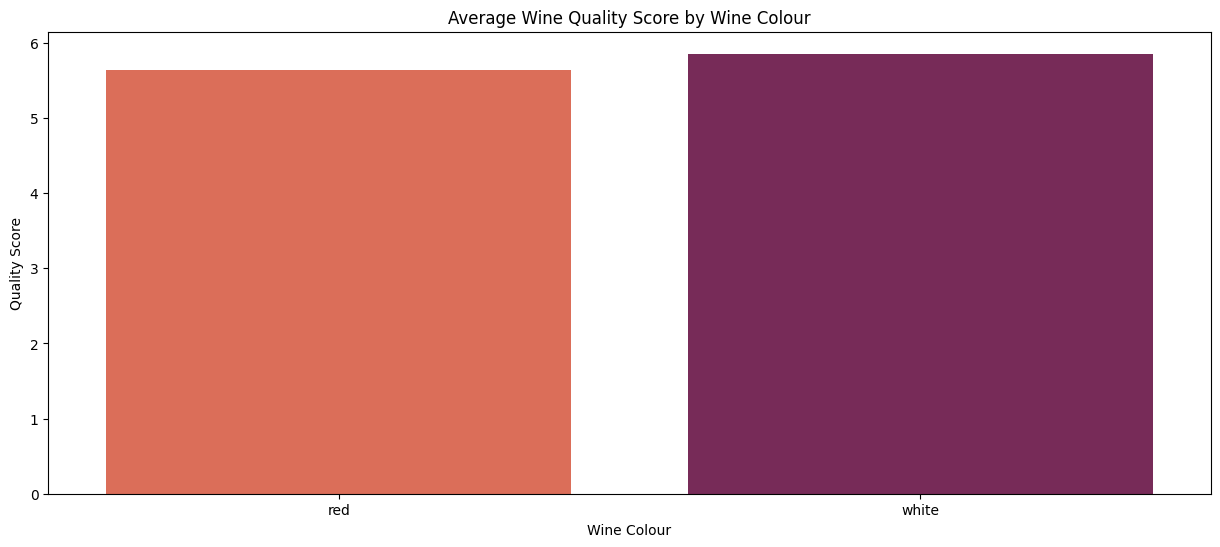

In [26]:
# Grouping the wines by colour and calculating mean quality scores

avg_quality_by_colour = cleaned_wine_data.groupby('colour')['quality'].mean().reset_index()


# Plotting grouped bar plot

plt.figure(figsize=(15, 6))
sns.barplot(x='colour', y='quality', data=avg_quality_by_colour, palette='rocket_r')
plt.title('Average Wine Quality Score by Wine Colour')
plt.xlabel('Wine Colour')
plt.ylabel('Quality Score')
plt.show()

It can be seen that based on wine colour alone, there isn't much of a difference between the mean wine quality scores. The white wine has a slightly higher mean score, although this van be due to there being almost 3 times as much white wine data as there is for red wine.

## **4.   Model Selection and Training**

Based on the analysis above, we narrowed our model selections to 3 models that will be trained, for the following reasons:
* Wine quality scores are discrete values, so a classification model will best suit this project.
* Due to the many features and how they influence each other, a more complex model that takes these into account is required.
* Class imbalance of the white wine data vs the red wine data means a model that does not favour the majority class, or a model weights classes, should be used.


---



The models I have chosen and the reasons as to why are as follows:

**1. Logistic Regression**

Logistic regression works to predict that something, in this case a particular wine, belongs to a certain class. This can be used as a baseline model to compare against the more complex models that will be explored later. This model looks at the relationship between the properties and the quality, and there is also an option to weight the classes.

**2. Decision Tree**

Decision trees sorts the data by creating rules which the data then follows as a flow based on its asnwers tp the rules. This creates a tree like image if shown as a diagram. It starts with the entire dataset, and eventually goes down to the value. Therefore on a trained model, the new data can follow this model down to the correct predicted value. This model also has an option to weight the classes.

**3. Neural Network**

Neural network is the most complex out of the data, and uses large datasets to find complex patterns through interconnected nodes. This model is also useful in finding relationships between the features in the dataset, something that it can peform better at compared to the models above. This model also has an option to weight the classes.

### **Model Pre-processing**

Before the data can be fed into any machine learning model, it needs to be formatted in a manner that the ML model can use. In this case, the wine colour names are being encoded.

##### **Colour Name Encoding**

In [27]:
# Initialising an instance

label_encoder = LabelEncoder()

# Using the encoder instance to change the wine colour names into numerical representations

encoded_colours = label_encoder.fit_transform(cleaned_wine_data['colour'])

print("Encoded colours (after label encoding):")
print(encoded_colours)

Encoded colours (after label encoding):
[0 0 0 ... 1 1 1]


In [28]:
# Reshaping the encoded_colours to meet the input requirements of OneHotEncoder

encoded_colours = encoded_colours.reshape(-1, 1)

# Transforming the encoded numerical labels into one-hot encoded vectors

onehot_encoder = OneHotEncoder(sparse_output=False)
onehot_encoded = onehot_encoder.fit_transform(encoded_colours)

print("\nOne-hot encoded colours:")
print(onehot_encoded)


One-hot encoded colours:
[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [29]:
# Decoding to check that encoding has worked correctly

decoded_categories = label_encoder.inverse_transform(np.argmax(onehot_encoded, axis=1))

print("\nDecoded colours:")
print(decoded_categories)


Decoded colours:
['red' 'red' 'red' ... 'white' 'white' 'white']


Above shows that the encoding process was successful with:
* White wine = 1
* Red wine = 0

In [30]:
# A column is added for the encoded brand values
cleaned_wine_data['colour_encoded'] = label_encoder.fit_transform(cleaned_wine_data['colour'])

Now that the brand names have been encoded, we can start the ML model building process, starting first with splitting the data into training, validation and testing data.

##### **Splitting the data: Train, Validation, Test Sets**

First what is defined are the features of the model (using the dataset properties) and the target (in this case, quality as that is what we would like to predict).

In [31]:
# The features and target are defined

X = cleaned_wine_data[['fixed acidity',	'volatile acidity',	'citric acid',	'residual sugar',	'chlorides',	'free sulfur dioxide',	'total sulfur dioxide',	'density',	'pH',	'sulphates',	'alcohol', 'colour_encoded']]  # features (input)
y = cleaned_wine_data['quality']  # target

One can then split the data into training, validation and testing data using scikit learn's 'train_test_split' random sampling funtion. As train_test_split splits data into only 2 (usually for training and test), first split the data into 2 to extract the training set, then split the remaining data into 2 again to get the validation and testing sets.

A **70:15:15** split was used to ensure that the training set is the largest set.

* Below in the code, 'test_size=0.3' means that the training set will be 70% of the data and the rest (30%) is ued as the test set. But due to the above, this 30% will be further split in half for validation and testing sets.

* The random_state was set as random_state=42, to ensure that the same split is used every time the code is executed.

In [32]:
# The data is split into training, validation and testing data

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [33]:
# Checking the size of the training, validation and testing data

print("Training set size:", X_train.shape[0])
print("Validation set size:", X_val.shape[0])
print("Test set size:", X_test.shape[0])

Training set size: 3684
Validation set size: 790
Test set size: 790


Now that the data has been appropriately split, the last stage in preprocessing is to apply feature scaling to the sets.

##### **Feature Scaling**

Feature Scaling standardizes the data variables in order to prevent varying numerical ranges of the variables affecting the model's performance (due to bias). This promotes equality and reduces larger influence on the model based on the range size.

In [34]:
# Introducing a scalar that will be used to standardise the features
scaler = StandardScaler()

# Fitting the scaler to the training data and transforming it into the standardized training data.
X_train_scaled = scaler.fit_transform(X_train)

# Same transformation with same scaler but without re-fitting applied to the validation and test data, resulting in standardized validation and test data.
X_val_scaled = scaler.fit_transform(X_val)
X_test_scaled = scaler.fit_transform(X_test)

### **Accuracy Score Function**

Before the models are built, a function for computing the accuracy score using sklearn is defined. This is so that the performance of each model can be quickly determined, before exploring the performance metrics in more depth later.

In [35]:
# Defining function for the accuracy of the model, as a percentage

def accuracy(y_test, y_pred):
    acc = accuracy_score(y_test, y_pred)
    return round(acc*100, 2)

We can now start to build our models.

### **4.1 - Logistic Regression**

#### **Building the model**

From the sklearn library the LogisticRegression model is called. We fit our sets to it and enter in the required parameters.

In [36]:
# Creation of model

lrmodel = LogisticRegression(max_iter=5000, random_state=42)

# Model is trained on training data

lrmodel.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=5000, random_state=42)

We can then use the model to give predicted (target) quality values from the validation data, using the validation input data. At this stage we are seeing if our model works.

In [37]:
# Prediction applied - uses the model to predict the quality based of validation data

y_pred_val_lr = lrmodel.predict(X_val_scaled)

# Calculating the accuracy of our model at this stage

print("Accuracy of the Logistic Regression model at the validation stage: {}%".format(accuracy(y_val, y_pred_val_lr)))

Accuracy of the Logistic Regression model at the validation stage: 57.22%


We can now use the test set to see the performance of our model. If the the accuracy on the test set is lower than the accuracy on the validation set, it means we have overfitted.

In [38]:
# Prediction applied - uses the model to predict the quality based of test data

y_pred_test_lr = lrmodel.predict(X_test_scaled)

# Calculating the accuracy of our model at this stage

print("Accuracy of the Logistic Regression model at the test stage: {}%".format(accuracy(y_test, y_pred_test_lr)))

Accuracy of the Logistic Regression model at the test stage: 53.29%


#### **Hyperparameter Tuning**

At this stage, we can work to improve the model by finding the best parameters to use through hyperparameter fine tuning. For this, the random search method via RandomizedSearchCV was used because it works well with large datasets, and is less computationally exhuastive than using the grid search method.

In [39]:
# First creating a dictionary to define the parameter distribution (recommended parameters from CFG session 11)

param_dist = {
    'C': [0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear']
}

# Defining the parameters

random_search_CV = RandomizedSearchCV(
    estimator=LogisticRegression(max_iter=5000, random_state=42),
    param_distributions=param_dist,
    n_iter=6,
    cv=10,  #cross validation folds
    random_state=42,
    n_jobs=-1
)

We can now use this to find the best model parameters.

In [40]:
# Fitting the training set to hyperparameter tuner
random_search_CV.fit(X_train_scaled, y_train)

# Now creating a model mased on the best hyperparameter configuration found
best_lrmodel = random_search_CV.best_estimator_

# Displaying the best model
best_lrmodel

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


LogisticRegression(C=0.1, max_iter=5000, random_state=42)

We can now predict using this model, and print the accuracy results.

In [41]:
# Prediction applied - uses the model to predict the quality based of test data

y_pred_best_lr = best_lrmodel.predict(X_test_scaled)

# Calculating the accuracy of the best model

print("Accuracy of the model: {}%".format(accuracy(y_test, y_pred_best_lr)))

Accuracy of the model: 53.42%


#### **Accuracy Plot**

We can also display how well the model performed in a visual way. As we are working with discrete target values and therefore our models are classification based, a confusion matrix will be used to display the accuracy of these models.

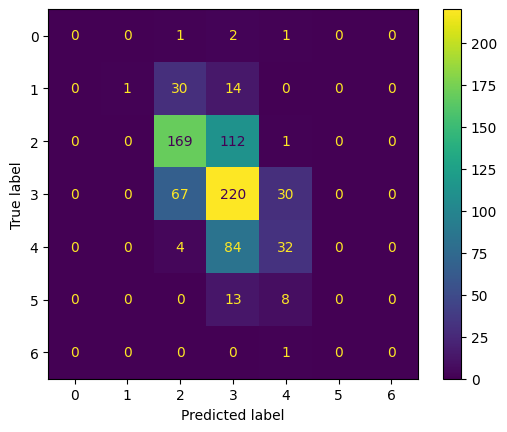

In [42]:
# Coding the confusion matrix using confusion_matrix from sklearn

lr_cm = confusion_matrix(y_test, y_pred_best_lr)

# Plotting and displaying the confusion matrix

lr_cm_plot = ConfusionMatrixDisplay(confusion_matrix=lr_cm)
lr_cm_plot.plot()


Because there are 7 available classes in the dataset (ratings 3 - 9), there are 7 classes in the confusion matrix. the (3,3) and (2,2) mark is showing how often the correct values are predicted for a quality rating of 6 and 5, respectively. The (3,3) mark is showing that there are 215 cases where the model correctly predicted a value of 6. However, other cases show incorrectly predicted values, such as the (2,3) mark, which shows that the model worngly predicted a score of 5 for an actual score of 6, 74 times.

From here we can build the other models, this time using the train and test sets and hyperparameter tuning to build our model, rather than incorportaing it later.

### **4.2 - Decision Tree**

#### **Building the model with hyperperameter tuning**

In [43]:
# First creating a dictionary to define the parameter distribution (recommended parameters from CFG session 11)

param_dist = {
    'max_depth': [None, 50, 100],  #how deep the decision tree will be (like the hierarchy levels of a family tree)
    'min_samples_split': [3, 5],
    'min_samples_leaf': [1, 2, 5]
}

# Defining the parameters

random_search_CV_dt = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=10,
    cv=10,
    random_state=42,
    n_jobs=-1
)

In [44]:
# Fitting the training set to hyperparameter tuner
random_search_CV_dt.fit(X_train_scaled, y_train)

# Now creating a model mased on the best hyperparameter configuration found
best_dtmodel = random_search_CV_dt.best_estimator_

# Displaying the best model
best_dtmodel

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(


DecisionTreeClassifier(min_samples_leaf=5, min_samples_split=5, random_state=42)

In [45]:
# Prediction applied - uses the model to predict the quality based of test data

y_pred_best_dt = best_dtmodel.predict(X_test_scaled)

# Calculating the accuracy of the best model

print("Accuracy of the model: {}%".format(accuracy(y_test, y_pred_best_dt)))

Accuracy of the model: 47.59%


#### **Accuracy Plot**

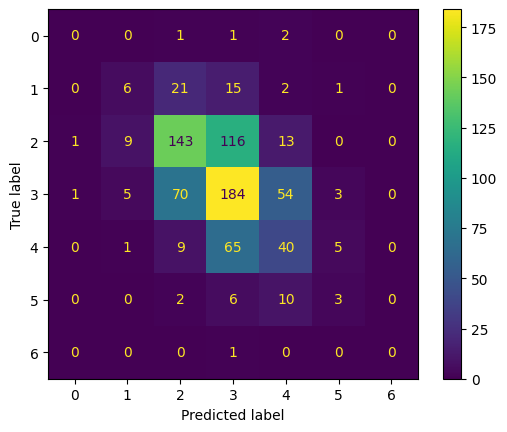

In [46]:
# Coding the confusion matrix using confusion_matrix from sklearn

dt_cm = confusion_matrix(y_test, y_pred_best_dt)

# Plotting and displaying the confusion matrix

dt_cm_plot = ConfusionMatrixDisplay(confusion_matrix=dt_cm)
dt_cm_plot.plot()

### **4.3 - Neural Network**

Lastly, we will build a Neural Network model, with 6 layers (input, 2 dense hidden and 2 dense dropout and output) using the Keras Sequential model.

#### **Building the model with hyperperameter tuning**

First the sets are rescalled to start with a cleaner approach.

In [47]:
# # Introducing a scalar that will be used to standardise the features
nn_ss = StandardScaler().fit(X_train)

# Scaling the train set
X_train_scaled_nn = nn_ss.transform(X_train)

# Scaling the test set
X_test_scaled_nn = nn_ss.transform(X_test)

In [48]:
# Defining a function for creating the model, along with the layers

def create_model(optimizer='adam', dropout_rate=0.0):
    model = Sequential()
    model.add(Input(shape=(12,)))
    #model.add(Input(shape=(X_train_scaled_nn.shape[1],)))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [49]:
# Defining the optimizer using Adam and applyng it to our model

model = KerasClassifier(
    model=create_model,
    optimizer='adam',
    dropout_rate=0.3,
    batch_size=32,
    epochs=10
)

In [50]:
# Creating a dictionary to define the parameters that the hyperparameter tuning module will choose from

param_dist = {
    'optimizer': ['adam'],
    'dropout_rate': [0.3, 0.5, 0.7],
    'batch_size': [32, 50, 64],
    'epochs': [10, 40, 50]
}

# Defining the hyperparameter tuning parameters

random_search_nn = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=10,
    scoring='accuracy',
    cv=3,
    random_state=42,
    verbose=0
)

In [51]:
# Fitting the data to the model

random_search_result = random_search_nn.fit(X_train_scaled_nn, y_train)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0239 - loss: -0.7591
Epoch 2/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0261 - loss: -13.4271
Epoch 3/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0369 - loss: -61.0595
Epoch 4/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0379 - loss: -198.3724
Epoch 5/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0367 - loss: -546.4286
Epoch 6/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0372 - loss: -1096.5121
Epoch 7/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0363 - loss: -2072.9490
Epoch 8/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0373 - loss: -3431.7590
Epoch 9/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0312 - loss: -5496.4810
Epoch 10/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0329 - loss: -7940.1958
Epoch 11/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0351 - loss: -11124.3887
Epoch 12/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/ste

In [52]:
# Now creating a model based on the best hyperparameter configuration found
best_nnmodel = random_search_result.best_estimator_

# Displaying the best model
best_nnmodel

KerasClassifier(
	model=<function create_model at 0x7c119ed255a0>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=adam
	loss=None
	metrics=None
	batch_size=32
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=50
	dropout_rate=0.7
	class_weight=None
)

In [53]:
# Prediction applied - uses the model to predict the quality based of test data

y_pred_best_nn = best_nnmodel.predict(X_test_scaled_nn)

# Calculating the accuracy of the best model

print("Accuracy of the model: {}%".format(accuracy(y_test, y_pred_best_nn)))

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Accuracy of the model: 0.51%


#### **Accuracy Plot**

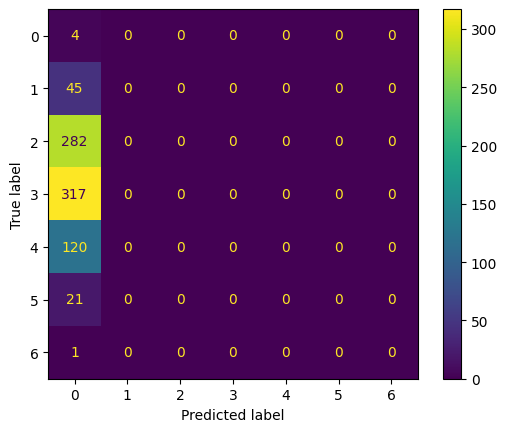

In [54]:
# Coding the confusion matrix using confusion_matrix from sklearn

nn_cm = confusion_matrix(y_test, y_pred_best_nn)

# Plotting and displaying the confusion matrix

nn_cm_plot = ConfusionMatrixDisplay(confusion_matrix=nn_cm)
nn_cm_plot.plot()

## **5.   Model Evaluation & Conclusion**

Overall, unfortunately none of the models managed to yield a high accuracy percentage for predicting the quality score of wine. The Logistic Regression model worked the best, with an accuracy of 53.42%, meaning that the model has a probability of predicting the right score just over half of the time.

We can also use the model performance function from session 11 of the course to determine performance metrics along with accuracy for each of our models.

In [55]:
# Defining the model performance function

def model_performance(y_true, y_pred, model_name):
    acc = accuracy_score(y_true, y_pred)
    ps = precision_score(y_true, y_pred, average='weighted')
    rs = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    performance = {
        'Algorithm': model_name,
        'Accuracy': round(acc*100, 2),
        'Precision': round(ps*100, 2),
        'Recall': round(rs*100, 2),
        'F1 Score': round(f1*100, 2)
    }
    return performance

In [56]:
# Using the function for the 3 models

# Logistic Regression
lr_performance = model_performance(
    y_true=y_test,
    y_pred=y_pred_best_lr,
    model_name='Logistic Regression'
)

# Decision Tree
dt_performance = model_performance(
    y_true=y_test,
    y_pred=y_pred_best_dt,
    model_name='Decision Tree'
)

# Neural Network
nn_performance = model_performance(
    y_true=y_test,
    y_pred=y_pred_best_nn,
    model_name='Neural Network'
)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [57]:
# Putting them all in a list
performance_list = [
    lr_performance,
    dt_performance,
    nn_performance
]

# Setting list as a dataframe
performance_df = pd.DataFrame(performance_list)

# Sort from highest to lowest accuracy
performance_df_sorted = performance_df.sort_values(by='Accuracy', ascending=False)

# Displaying dataframe
performance_df_sorted

,Algorithm,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,53.42,54.45,53.42,50.27
1,Decision Tree,47.59,47.09,47.59,46.84
2,Neural Network,0.51,0.00,0.51,0.01


#### **Final Thoughts**
Even though the models did not yield very high accuracies, it was a really interesting challenge. The project taught me how data cleaning is vital to an effective machine learning model, so it was important to scrutinise data in more detail to make sure that I have used the best cleaning approcahes. The project also gave me more insight into how complex machine learning models really are, because of the many parameters that can be applied, and how each model differently analyses data to make predictions. It definitely aided in bringing what was learnt in the courses to life, and I aim on further working on this model to build my skills and see how I can further improve each model's accuracy. Some ideas on further improvements are below:

#### **Improvements:**
* More research to determine what went wrong/how to significantly increase the accuracy in my models. E.g. by resampling the data to handle the imbalance. (Note: I did try out resampling with this code `raw_data_white = resample(raw_data_white, replace=False, n_samples=len(raw_data_red), random_state=42)`, nbut this did not chnage the accuracy of the data, so assuming the issue is coming from somewhere else, or a different way to balance the ata should be used).
* Larger range of data, also covering wines with scores below 3 and above 9.
* Consider resampling before building the models, rather than class weighting within the models
* Experimenting with a different hyperparameter tuning module e.g. GridSearchCV.
* Use a different scalling approach, e.g. normalisation method where each coloumn is divided by the maximum value in that column.
* Look more into feature importance, and how the model will change if we maybe eliminate those with little importance (will it reduce noise and improve accuracy?).
* With more time, try more models, such as a random forest, which is a more complex version of the decision tree model.


## **References**
1. https://archive.ics.uci.edu/dataset/186/wine+quality
2. https://www.geeksforgeeks.org/ml-feature-scaling-part-2/
3. https://www.scaler.com/topics/machine-learning/random-search-in-machine-learning/
4. https://scikit-learn.org/stable/modules/model_evaluation.html#using-multiple-metric-evaluation
5. https://blogs.sas.com/content/subconsciousmusings/2020/12/09/machine-learning-algorithm-use/
6. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html
7. CFG AI & ML Course Session 11 practise notebook
8. CFG AI & ML Course Notes
